In [41]:
# 구글 티처블머신 모델 불러오기_09_03_01
import tensorflow as tf
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
model_path = 'gymnastic_keras/model.savedmodel' # 모델 경로 설정
model = tf.saved_model.load(model_path)
print(model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x0000014DB2DA5A50>


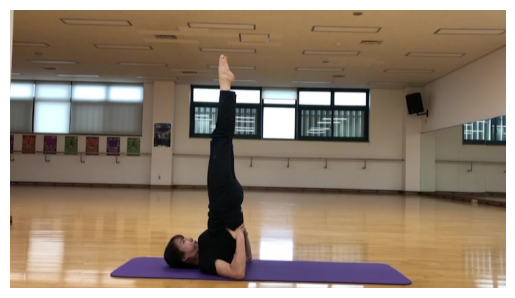

성공판단: 99.93%, 실패판단: 0.07%
성공입니다. 좋은 자세유지를 위해 계속 노력해 주세요.


In [48]:
# 구글 티처블머신 활용 동작평가_09_03_02
image_path = 'apply/apply1.jpg'  # 이미지를 선택하세요.
image = Image.open(image_path)
image = image.resize((224, 224))  # 모델의 입력 크기에 맞게 조정
image = np.array(image, dtype=np.float32) / 255.0
if image.shape[-1] == 4: # 이미지가 4채널인 경우, 마지막 채널을 제거
    image = image[:, :, :-1]
image = np.expand_dims(image, axis=0)  # 배치 차원을 추가하여 모델의 입력 형태에 맞춤
predictions = model(image)  # 모델을 호출하여 예측 수행
success_probability = predictions[0][0]*100  # "성공" 클래스에 대한 확률
failure_probability = predictions[0][1]*100  # "실패" 클래스에 대한 확률
plt.imshow(np.array(Image.open(image_path))) # 결과 출력
plt.axis('off')
plt.show()
print(f"성공판단: {success_probability:.2f}%, 실패판단: {failure_probability:.2f}%")
if success_probability > failure_probability:
    print('성공입니다. 좋은 자세유지를 위해 계속 노력해 주세요.')
else:
    print('실패입니다. 엉덩이 또는 무릎을 펴야 합니다.')

['apply/apply1.jpg', 'apply/apply2.jpg', 'apply/apply3.jpg', 'apply/apply4.jpg', 'apply/apply5.jpg']


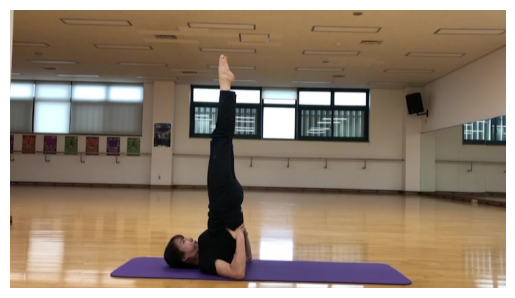

성공판단: 99.93%, 실패판단: 0.07%
성공입니다! 좋은 자세유지를 위해 계속 노력하세요.


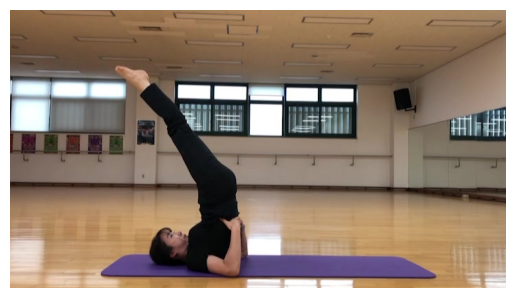

성공판단: 23.23%, 실패판단: 76.77%
실패입니다. 엉덩이 또는 무릎을 펴야 합니다.


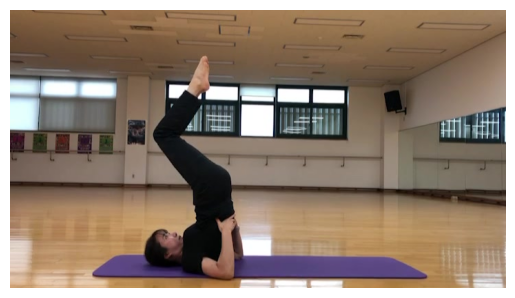

성공판단: 20.99%, 실패판단: 79.01%
실패입니다. 엉덩이 또는 무릎을 펴야 합니다.


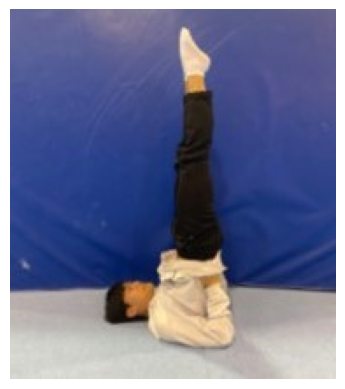

성공판단: 95.31%, 실패판단: 4.69%
성공입니다! 좋은 자세유지를 위해 계속 노력하세요.


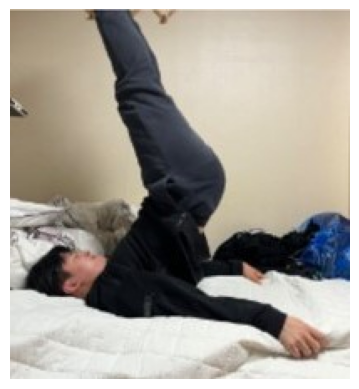

성공판단: 0.19%, 실패판단: 99.81%
실패입니다. 엉덩이 또는 무릎을 펴야 합니다.


In [47]:
# 학생 제출 과제 일괄평가_09_03_03
image_paths = ['apply/apply{}.jpg'.format(i) for i in range(1, 6)]
print(image_paths)
def predict_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # 모델의 입력 크기에 맞게 조정
    image = np.array(image, dtype=np.float32) / 255.0
    if image.shape[-1] == 4:
        image = image[:, :, :-1]
    image = np.expand_dims(image, axis=0)
    predictions = model(image)
    success_probability = predictions[0][0] * 100
    failure_probability = predictions[0][1] * 100
    return success_probability, failure_probability
for image_path in image_paths: # 이미지별로 예측 및 결과 출력
    success_probability, failure_probability = predict_image(image_path)
    plt.imshow(np.array(Image.open(image_path)))
    plt.axis('off')
    plt.show()
    print(f"성공판단: {success_probability:.2f}%, 실패판단: {failure_probability:.2f}%")
    if success_probability > failure_probability:
        print('성공입니다! 좋은 자세유지를 위해 계속 노력하세요.')
    else:
        print('실패입니다. 엉덩이 또는 무릎을 펴야 합니다.')

['apply1.jpg', 'apply2.jpg', 'apply3.jpg', 'apply4.jpg', 'apply5.jpg', 'apply6.jpg', 'apply7.jpg', 'apply8.jpg', 'apply9.jpg', 'apply10.jpg']
